In [1]:
#Importar librerias:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt


In [4]:
#Cargar datos:
data = pd.read_csv('Datos/spy.csv')

#Mostrar data:
data

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,24.781359,24.781359,24.658069,24.763746,1003200,29,4,4,1,1993
1,1993-02-01,24.781338,24.939854,24.781338,24.939854,480500,1,0,5,2,1993
2,1993-02-02,24.922257,25.010321,24.869418,24.992708,201300,2,1,5,2,1993
3,1993-02-03,25.027927,25.274508,25.010314,25.256895,529400,3,2,5,2,1993
4,1993-02-04,25.344966,25.415418,25.063160,25.362579,531500,4,3,5,2,1993
...,...,...,...,...,...,...,...,...,...,...,...
7886,2024-05-24,527.849976,530.270020,526.880005,529.440002,41258400,24,4,21,5,2024
7887,2024-05-28,530.270020,530.510010,527.109985,529.809998,36269600,28,1,22,5,2024
7888,2024-05-29,525.679993,527.309998,525.369995,526.099976,45190300,29,2,22,5,2024
7889,2024-05-30,524.520020,525.200012,521.330017,522.609985,46468500,30,3,22,5,2024


<Axes: >

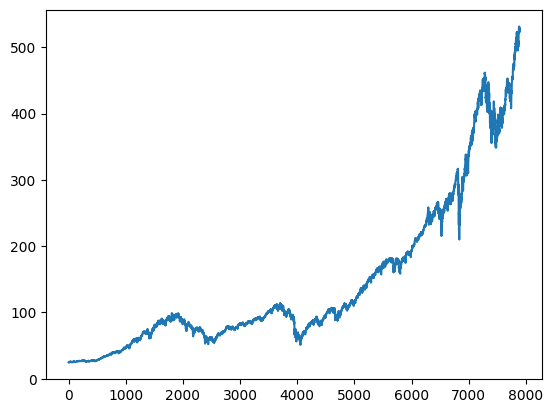

In [5]:
#Mostrar datos con gráficos:
data["Close"].plot()

In [6]:
#Separar datos entre entrenamiento y prueba:
train_data = data.iloc[:int(.99 * len(data)), :]
test_data = data.iloc[int(.99 * len(data)):, :]

In [7]:
#Definir variables objetivo y predictoras:
features = ["Open", "Volume"]
target = "Close"

In [8]:
#Crear y entrenar modelo:
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
#Hacer y mostrar las predicciones con los datos de prueba:
predictions = model.predict(test_data[features])
print("Model predictions: ")
print(predictions)

Model predictions: 
[473.1467  477.12384 490.4563  469.29694 475.17618 488.49567 485.83624
 485.8071  489.06592 485.4783  488.49567 472.03796 483.15524 490.4563
 477.3568  485.4783  483.03754 487.63043 475.17618 488.9105  474.53613
 475.13712 487.63043 474.34106 477.60168 478.2014  479.8596  489.09457
 479.2796  488.35544 481.9362  483.19394 473.87885 475.03818 489.53497
 475.13712 489.7966  488.9105  489.53497 489.7966  483.19394 475.17618
 475.03818 484.09055 480.78073 480.78073 487.63043 485.83624 489.7966
 470.70096 473.46857 477.12384 490.4563  471.4319  477.12384 483.6117
 475.85022 481.624   475.13712 485.85138 483.6117  473.11914 484.05304
 483.6117  473.1467  483.09857 476.9231  489.06592 472.03796 489.06592
 483.57193 483.4728  483.19394 478.59235 484.05304 483.10156 483.6117
 483.6117  477.14233]


In [10]:
#Mostrar valores actuales:
print("Actual values: ")
print(test_data[target])

Actual values: 
7812    496.776489
7813    499.647583
7814    499.428253
7815    492.549622
7816    497.025726
           ...    
7886    529.440002
7887    529.809998
7888    526.099976
7889    522.609985
7890    527.369995
Name: Close, Length: 79, dtype: float64


In [11]:
#Mostrar exactitud del modelo:
accuracy = model.score(test_data[features], test_data[target])
print("Accuracy: ")
print(accuracy)

Accuracy: 
-9.424313920231844


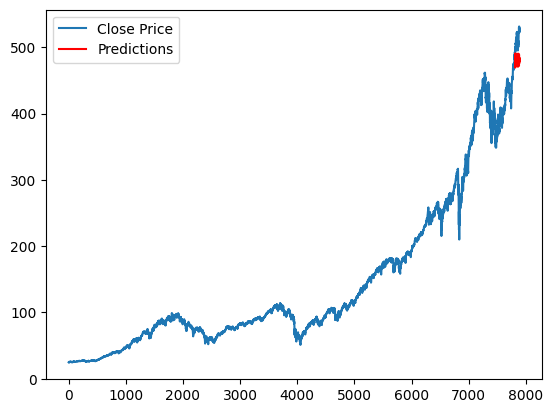

In [13]:
#Graficar las predicciones:
plt.plot(data["Close"], label="Close Price")
plt.plot(test_data[target].index, predictions, label="Predictions", color="red")
plt.legend()
plt.show()